<h1 style="text-align:center"><strong>Price Elasticity of Demand</strong></h1>

<h2><strong>Problem Statement</strong></h2>


<pre><code>ABC Electronics is a company that produces and sells a variety of electronics goods, including speakers, laptops, and televisions. The company is facing a major challenge in managing their inventory. Despite their efforts to reduce costs and increase sales, they have noticed a decline in sales for a particular category of products. They believe that the decline in sales is due to a change in consumer behaviour, specifically in the way that consumers are responding to changes in price. In order to address this issue, ABC Electronics has asked us to perform a data science project on the Price Elasticity of Demand for their products. This project will be developed with stakeholder"s needs in mind and potentially deliver significant value to sales, marketing, and regulatory managers, by providing data-driven insights into consumer behaviour and product demand.</code></pre>


In [2]:
# IMPORTING PACKAGES
# ------------------------------------------------------
import pandas as pd
import numpy as np
import os
import re
import warnings

# VISUALIZATION
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_columns = 0
pd.options.display.max_colwidth =10

# CONFIGURATIONS
# ------------------------------------------------------
warnings.filterwarnings("ignore")

<h2><strong>Data Gathering</strong></h2>


<pre><code>ABC Electronics has provided us with sales data for the past three years, including information on product categories, prices, and quantities sold.</code></pre>

In [3]:
#os.chdir("C:\\Users\\SkyLake\\Documents\\Python2.0\\01-ML-PEoD\\data")
os.chdir("data/")
raw_data = "G1-PriceElasticityOfDemand-FinalDataSetCombined.csv"

In [4]:
pwd

'C:\\Users\\SkyLake\\Documents\\Python2.0\\01-ML-PEoD\\data'

In [5]:
df = pd.read_csv(raw_data)

In [6]:
df.head(1)

,id,prices.amountMax,prices.amountMin,prices.availability,prices.condition,prices.currency,prices.dateSeen,prices.isSale,prices.merchant,prices.shipping,prices.sourceURLs,Cluster,Category_name,asins,brand,categories,dateAdded,dateUpdated,ean,imageURLs,keys,manufacturer,manufacturerNumber,name,primaryCategories,sourceURLs,upc,weight,shipping,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32
0,AVphzg...,104.99,104.99,Yes,New,USD,2017-0...,False,Bestbu...,NaN,http:/...,11,"mount,...",B00C78...,Sanus,Audio ...,2015-0...,2018-0...,NaN,https:...,sanusv...,NaN,VLF410B1,Sanus ...,Electr...,https:...,7.94E+11,32.8 p...,NaN,NaN,NaN,NaN,NaN


In [7]:
# some general information 
print(f"Total number of rows : = {df.shape[0]}")
print(f"Total number of columns : = {df.shape[1]}")

Total number of rows : = 14592
Total number of columns : = 33


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14592 entries, 0 to 14591
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   14592 non-null  object 
 1   prices.amountMax     14592 non-null  float64
 2   prices.amountMin     14592 non-null  float64
 3   prices.availability  12667 non-null  object 
 4   prices.condition     13189 non-null  object 
 5   prices.currency      14592 non-null  object 
 6   prices.dateSeen      14592 non-null  object 
 7   prices.isSale        14592 non-null  bool   
 8   prices.merchant      13820 non-null  object 
 9   prices.shipping      8793 non-null   object 
 10  prices.sourceURLs    14592 non-null  object 
 11  Cluster              14592 non-null  int64  
 12  Category_name        14592 non-null  object 
 13  asins                14592 non-null  object 
 14  brand                14592 non-null  object 
 15  categories           14592 non-null 

<h2><strong>Data Cleaning/Preprocessing</strong></h2>

In [9]:
#Selecting only the columns we require 
df = df.drop(df.columns[-4:], axis=1)
#Removing unnecessary columns
df = df.drop(["primaryCategories","imageURLs","sourceURLs","ean","asins","upc","keys"],axis=1)

In [10]:
#Counting the total imp of product
def imp_date(x1):
    x1_list =x1.strip("'").split(",")
    return x1_list

def imp_counter(x1):
    x1_list =x1.strip("'").split(",")
    x1_count = len(x1_list)
    return x1_count


df["Date"]= df["prices.dateSeen"].apply(imp_date)
df["Imp_count"]= df["prices.dateSeen"].apply(imp_counter)

df =df.explode("Date")

In [11]:
df["prices.availability"].unique()

array(['Yes', 'In Stock', 'TRUE', 'undefined', 'yes', 'Out Of Stock',
       'Special Order', 'No', 'More on the Way', 'sold', 'FALSE',
       'Retired', '32 available', '7 available', nan, 'Limited Stock',
       'Discontinued', 'More Coming Soon'], dtype=object)

In [12]:
# Price availability is categorized
df["prices.availability"] = np.where(df["prices.availability"].str.contains("Yes|TRUE|In Stock|yes|available",case=False),"Yes",
                            np.where(df["prices.availability"].str.contains("Discontinued|Retired|FALSE|No|sold",case=False),"No",
                            np.where(df["prices.availability"].str.contains("Yes|In Stock",case=False),"Special",np.NaN)))

In [13]:
#Product condition categorization
df["prices.condition"] = np.where(df["prices.condition"].str.contains("new",case=False),"New",
                         np.where(df["prices.condition"].str.contains("refurbished",case=False),"Refurbished",
                         np.where(df["prices.condition"].str.contains("pre-owned|used",case=False),"Used",np.NaN)))

In [14]:
#Seller Names
SURL = df["prices.sourceURLs"]
df['Merchant'] = pd.np.where(SURL.str.contains('bhphotovideo', case=False), "bhphotovideo.com",
                 pd.np.where(SURL.str.contains('eBay|e bay', case=False), "ebay.com",
                 pd.np.where(SURL.str.contains('Amazon',case=False), "Amazon.com", 
                 pd.np.where(SURL.str.contains('Bestbuy',case=False), "Bestbuy.com",
                 pd.np.where(SURL.str.contains('Homedepot',case=False), "homedepot.com",
                 pd.np.where(SURL.str.contains('newegg',case=False), "newegg.com",
                 pd.np.where(SURL.str.contains('kmart',case=False), "kmart.com",
                 pd.np.where(SURL.str.contains('frys',case=False), "frys.com",
                 pd.np.where(SURL.str.contains('cdw',case=False), "cdw.com",
                 pd.np.where(SURL.str.contains('target',case=False), "target.com",
                 pd.np.where(SURL.str.contains('overstock',case=False), "overstock.com",
                 pd.np.where(SURL.str.contains('barcodable',case=False), "barcodable.com",
                 pd.np.where(SURL.str.contains('kohls',case=False), "kohls.com",
                 pd.np.where(SURL.str.contains('sears',case=False), "sears.com",
                 pd.np.where(SURL.str.contains('Wal-mart|Walmart',case=False), "Walmart.com","Other")))))))))))))))

In [15]:
df["Merchant"].value_counts().head(15)

Bestbuy.com         16709
bhphotovideo.com    10260
Walmart.com          6179
ebay.com             4406
Amazon.com           2381
target.com           2220
Other                 285
kohls.com             248
barcodable.com        138
frys.com              126
kmart.com             115
cdw.com                79
newegg.com             46
homedepot.com          27
sears.com              10
Name: Merchant, dtype: int64

In [16]:
#Renaming Columns for ease of understanding
df = df.rename(columns={"prices.amountMax":"Actual_price",
                        "prices.amountMin":"Discount_price",
                        "prices.availability":"Product_availability",
                        "prices.condition":"Condition",
                        "prices.isSale":"isSale",
                        "categories":"Description",
                        "brand":"Brand",
                        "name":"Name"})

In [17]:
#Product is on sale or not checker
df['isSale'] = np.where(df['Actual_price']> df['Discount_price'],"Yes", "No")

In [18]:
###################### DATA FILTERING #########################
#setting some filters for major values
dfx = df[ (df["prices.currency"])=="USD"]
dfx = dfx[ (dfx["Condition"])=="New"]

In [19]:
dfx["Condition"].unique()

array(['New'], dtype=object)

In [20]:
#Percentage Discount
dfx["Discount_per"] = round((((dfx["Actual_price"]-dfx["Discount_price"])/dfx["Actual_price"])*100),2)

In [21]:
#Selecting only the columns we require 
dfx = dfx[["id","Name","Brand","Description","Category_name","Merchant","Actual_price","Discount_price","isSale","Discount_per","Imp_count","Date"]]

In [22]:
#Spliting date to > day, month, week, month name etc.
dfx['Date']= pd.to_datetime(dfx['Date'])
dfx['Day'] = dfx['Date'].dt.day
dfx['Month'] = dfx['Date'].dt.month
dfx['Year'] = dfx['Date'].dt.year
dfx['Week'] = dfx['Date'].dt.week
dfx['Month_Name'] = dfx['Date'].dt.strftime('%B')
dfx['Day_Name'] = dfx['Date'].dt.strftime('%A')
dfx['date'] = pd.to_datetime(dfx['Date'].dt.date)
dfx = dfx.drop(columns=["Date"])
dfx = dfx.rename(columns={"date":"Date"})

In [23]:
dfx = dfx.reset_index(drop=True)

In [24]:
dfx

,id,Name,Brand,Description,Category_name,Merchant,Actual_price,Discount_price,isSale,Discount_per,Imp_count,Day,Month,Year,Week,Month_Name,Day_Name,Date
0,AVphzg...,Sanus ...,Sanus,Audio ...,"mount,...",Bestbu...,104.99,104.99,No,0.00,4,30,3,2017,13,March,Thursday,2017-03-30
1,AVphzg...,Sanus ...,Sanus,Audio ...,"mount,...",Bestbu...,104.99,104.99,No,0.00,4,10,3,2017,10,March,Friday,2017-03-10
2,AVphzg...,Sanus ...,Sanus,Audio ...,"mount,...",Bestbu...,104.99,104.99,No,0.00,4,4,3,2017,9,March,Saturday,2017-03-04
3,AVphzg...,Sanus ...,Sanus,Audio ...,"mount,...",Bestbu...,104.99,104.99,No,0.00,4,3,3,2017,9,March,Friday,2017-03-03
4,AVpgMu...,Boyton...,Boytone,Stereo...,speake...,Walmar...,69.00,64.99,Yes,5.81,1,14,12,2017,50,December,Thursday,2017-12-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41864,AVpgib...,naxa -...,naxa,TVs & ...,"sound,...",Bestbu...,58.99,58.99,No,0.00,6,1,6,2017,22,June,Thursday,2017-06-01
41865,AVpgib...,naxa -...,naxa,TVs & ...,"sound,...",Bestbu...,58.99,58.99,No,0.00,6,1,6,2017,22,June,Thursday,2017-06-01
41866,AVpgib...,naxa -...,naxa,TVs & ...,"sound,...",Walmar...,58.49,58.49,No,0.00,1,5,3,2018,10,March,Monday,2018-03-05
41867,AVpgib...,naxa -...,naxa,TVs & ...,"sound,...",Walmar...,77.98,77.98,No,0.00,1,22,3,2016,12,March,Tuesday,2016-03-22


In [25]:
#Spliting data into 

In [26]:
dfx

,id,Name,Brand,Description,Category_name,Merchant,Actual_price,Discount_price,isSale,Discount_per,Imp_count,Day,Month,Year,Week,Month_Name,Day_Name,Date
0,AVphzg...,Sanus ...,Sanus,Audio ...,"mount,...",Bestbu...,104.99,104.99,No,0.00,4,30,3,2017,13,March,Thursday,2017-03-30
1,AVphzg...,Sanus ...,Sanus,Audio ...,"mount,...",Bestbu...,104.99,104.99,No,0.00,4,10,3,2017,10,March,Friday,2017-03-10
2,AVphzg...,Sanus ...,Sanus,Audio ...,"mount,...",Bestbu...,104.99,104.99,No,0.00,4,4,3,2017,9,March,Saturday,2017-03-04
3,AVphzg...,Sanus ...,Sanus,Audio ...,"mount,...",Bestbu...,104.99,104.99,No,0.00,4,3,3,2017,9,March,Friday,2017-03-03
4,AVpgMu...,Boyton...,Boytone,Stereo...,speake...,Walmar...,69.00,64.99,Yes,5.81,1,14,12,2017,50,December,Thursday,2017-12-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41864,AVpgib...,naxa -...,naxa,TVs & ...,"sound,...",Bestbu...,58.99,58.99,No,0.00,6,1,6,2017,22,June,Thursday,2017-06-01
41865,AVpgib...,naxa -...,naxa,TVs & ...,"sound,...",Bestbu...,58.99,58.99,No,0.00,6,1,6,2017,22,June,Thursday,2017-06-01
41866,AVpgib...,naxa -...,naxa,TVs & ...,"sound,...",Walmar...,58.49,58.49,No,0.00,1,5,3,2018,10,March,Monday,2018-03-05
41867,AVpgib...,naxa -...,naxa,TVs & ...,"sound,...",Walmar...,77.98,77.98,No,0.00,1,22,3,2016,12,March,Tuesday,2016-03-22


In [27]:
#Exporing the Cleaning Data as CSV
dfx.to_csv("CleanedData.csv",index=False)

<h2><strong>Visualization</strong></h2>

In [28]:
df = pd.read_csv("CleanedData.csv")

In [29]:
df

,id,Name,Brand,Description,Category_name,Merchant,Actual_price,Discount_price,isSale,Discount_per,Imp_count,Day,Month,Year,Week,Month_Name,Day_Name,Date
0,AVphzg...,Sanus ...,Sanus,Audio ...,"mount,...",Bestbu...,104.99,104.99,No,0.00,4,30,3,2017,13,March,Thursday,2017-0...
1,AVphzg...,Sanus ...,Sanus,Audio ...,"mount,...",Bestbu...,104.99,104.99,No,0.00,4,10,3,2017,10,March,Friday,2017-0...
2,AVphzg...,Sanus ...,Sanus,Audio ...,"mount,...",Bestbu...,104.99,104.99,No,0.00,4,4,3,2017,9,March,Saturday,2017-0...
3,AVphzg...,Sanus ...,Sanus,Audio ...,"mount,...",Bestbu...,104.99,104.99,No,0.00,4,3,3,2017,9,March,Friday,2017-0...
4,AVpgMu...,Boyton...,Boytone,Stereo...,speake...,Walmar...,69.00,64.99,Yes,5.81,1,14,12,2017,50,December,Thursday,2017-1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41864,AVpgib...,naxa -...,naxa,TVs & ...,"sound,...",Bestbu...,58.99,58.99,No,0.00,6,1,6,2017,22,June,Thursday,2017-0...
41865,AVpgib...,naxa -...,naxa,TVs & ...,"sound,...",Bestbu...,58.99,58.99,No,0.00,6,1,6,2017,22,June,Thursday,2017-0...
41866,AVpgib...,naxa -...,naxa,TVs & ...,"sound,...",Walmar...,58.49,58.49,No,0.00,1,5,3,2018,10,March,Monday,2018-0...
41867,AVpgib...,naxa -...,naxa,TVs & ...,"sound,...",Walmar...,77.98,77.98,No,0.00,1,22,3,2016,12,March,Tuesday,2016-0...


In [30]:
df["Discount_per"].value_counts()

0.00     39122
16.67      187
33.34      127
6.98        66
42.01       49
         ...  
14.37        1
65.52        1
12.08        1
21.30        1
9.48         1
Name: Discount_per, Length: 910, dtype: int64

In [31]:
df.columns

Index(['id', 'Name', 'Brand', 'Description', 'Category_name', 'Merchant',
       'Actual_price', 'Discount_price', 'isSale', 'Discount_per', 'Imp_count',
       'Day', 'Month', 'Year', 'Week', 'Month_Name', 'Day_Name', 'Date'],
      dtype='object')

In [32]:
print("Dataframe Dimensions:",df.shape)

Dataframe Dimensions: (41869, 18)


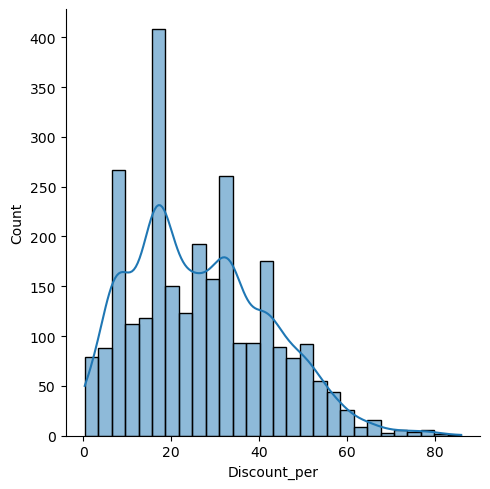

In [44]:
sns.displot( x=df[(df['Discount_per']>0)]['Discount_per'],kde=True)

<AxesSubplot:xlabel='Discount_per', ylabel='Imp_count'>

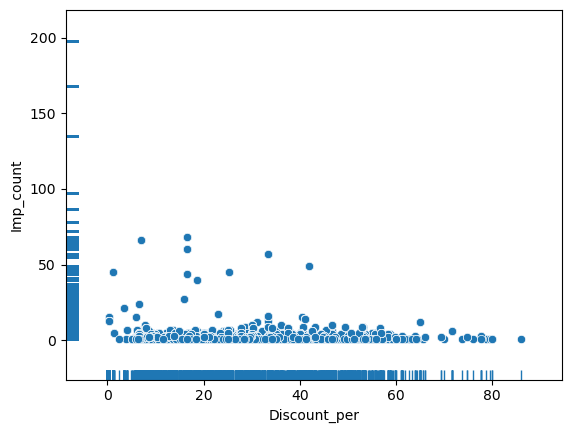

In [33]:
dd = df[(df['Discount_per']>0)]['Discount_per']
#Impresations vs Discount percentage
sns.scatterplot(x=df[(df['Discount_per']>0)]['Discount_per'], y=df['Imp_count'])
sns.rugplot(x=df['Discount_per'], y=df['Imp_count'])

<AxesSubplot:xlabel='Discount_per', ylabel='Imp_count'>

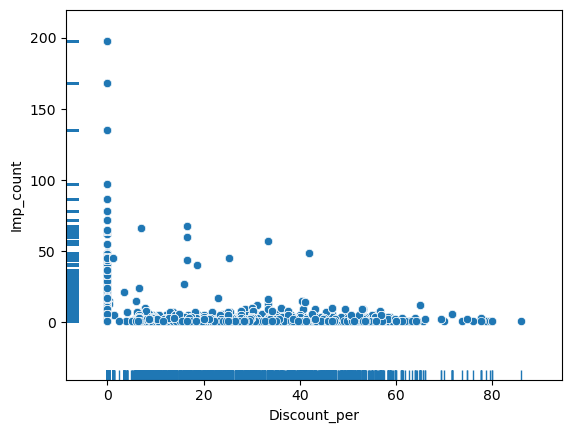

In [35]:
dd = df[(df['Discount_per']>0)]['Discount_per']
#Impresations vs Discount percentage
sns.scatterplot(x=df['Discount_per'], y=df['Imp_count'])
sns.rugplot(x=df['Discount_per'], y=df['Imp_count'])

<AxesSubplot:xlabel='Discount_per', ylabel='Merchant'>

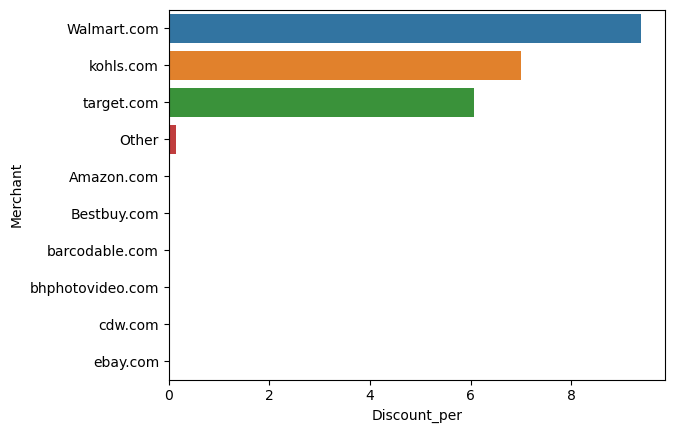

In [34]:
d1 = df.groupby(["Merchant"]).mean()
c1 = d1.reset_index()
c2 = c1.sort_values("Discount_per", ascending=False)
c3 = c2.head(10)
sns.barplot(data=c3,x="Discount_per",y="Merchant")

<AxesSubplot:xlabel='Discount_per', ylabel='Density'>

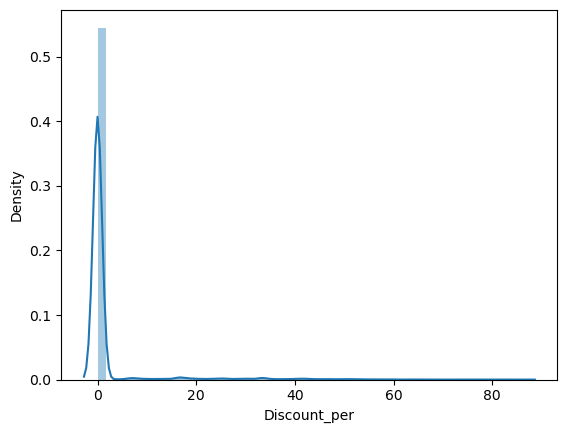

In [106]:
sns.distplot(df["Discount_per"])

Dataframe dimensions with impressions: (41869, 18)


,Products,Merchants,Impressions
2017 Quantity,1224,16,41869


None


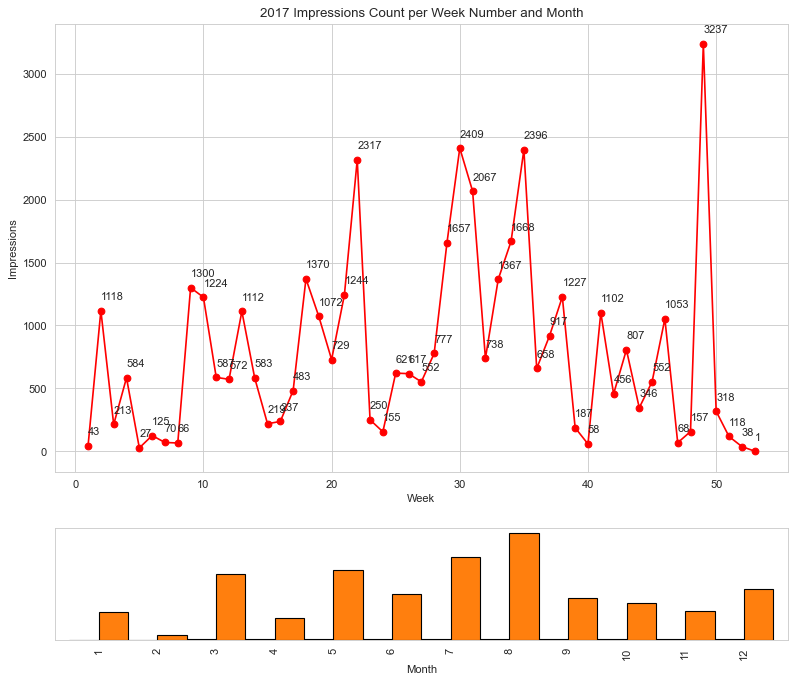

In [112]:
print("Dataframe dimensions with impressions:" ,df.shape)

summary = pd.DataFrame([{'Merchants': len(df['Merchant'].unique()),    
               'Impressions': len(df['Year']),
               'Products': len(df['Name'].unique()),  
              }], columns = [ 'Products','Merchants','Impressions'], 
              index = ['2017 Quantity'])

print(display(summary))

# Create Fig and gridspec
fig = plt.figure(figsize=(16, 10), dpi= 80)
grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)

# Define the axes
ax_main = fig.add_subplot(grid[:-1, :-1])
ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels=[], yticklabels=[])

sns.set_style("whitegrid")

#Linearplot for impressions per week during 2017
l_plot = df.groupby('Week')['Imp_count'].count().reset_index()
bar_subplot = df.groupby('Month')['Imp_count'].count().reset_index()
month_ = bar_subplot['Month']
week = l_plot['Week']
count_imp = l_plot['Imp_count']
count_impmon = bar_subplot['Imp_count']

#
ax_main.plot(week ,count_imp,color='red', marker='o')
ax_main.set(title='2017 Impressions Count per Week Number and Month', xlabel='Week', ylabel='Impressions')
for x,y in zip(week,count_imp):

    label = "{:.0f}".format(y)

    ax_main.annotate(label, # this is the text
                     (x,y), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(0,10), # distance from text to points (x,y)
                     ha='left') # horizontal alignment can be left, right or center


bar_subplot.plot.bar(ax=ax_bottom, legend = False, width=1, align= 'center',edgecolor='k')
ax_bottom.set(xlabel='Month')
ax_bottom.set_xticklabels(np.arange(min(month_), max(month_)+1))
ax_bottom.grid(False)
plt.show()

In [29]:
# by country -country -total sales
# total_sales vs sale is true or not
# at time what discount



In [31]:
#computer/tv/power/speaker/

<AxesSubplot:xlabel='Total_sales', ylabel='Brand'>

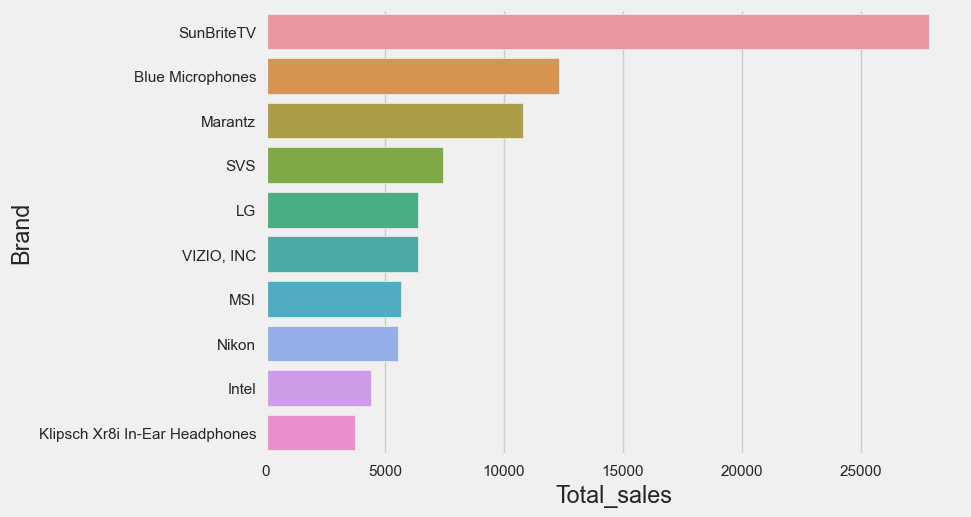

<AxesSubplot:xlabel='Country', ylabel='Total_sales'>

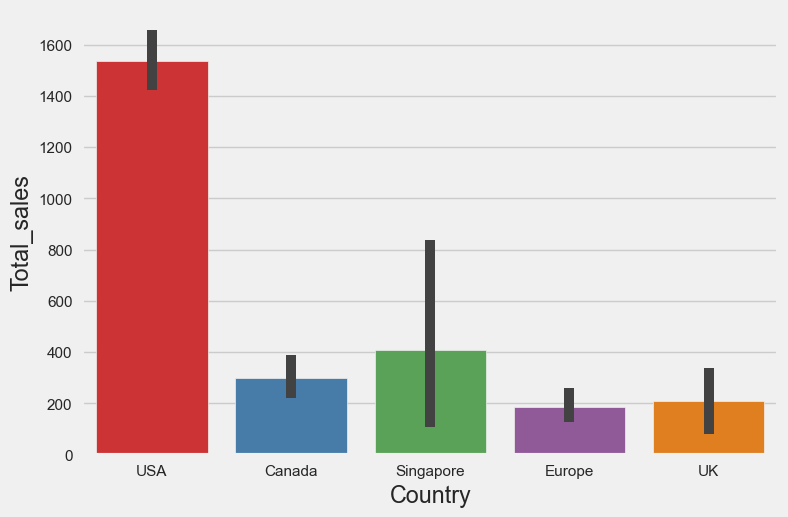

In [34]:
sns.barplot(data=df,x="Country",y="Total_sales")

In [35]:
sns.distplot(x=df[i])

NameError: name 'i' is not defined

In [ ]:
df["Merchant"].unique().__len__()

In [ ]:
xd = df["Merchant"].unique()


In [ ]:
df[df["Merchant"]=="walmart"].info()

In [ ]:
xd